In [3]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from neupy import algorithms, utils

W0812 13:40:31.021471 140236338386752 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [8]:
df = pd.read_csv('ppe.dat',delim_whitespace=True)
print(df.head())

      x     y
0  2376 -6504
1  5072 -6288
2 -6520  5008
3   944 -6408
4 -1784   264


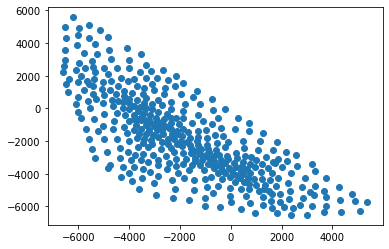

In [9]:
twodee = plt.figure().gca()
twodee.scatter(df['x'],df['y'])

In [26]:
# scale the input to the order of -1...1

data = df[['x','y']]*0.001

In [27]:
# instantiate the GNG network

def create_gng(max_nodes, step=0.5, n_start_nodes=2, max_edge_age=15):
    return algorithms.GrowingNeuralGas(
        n_inputs=2,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=True,

        step=step,
        neighbour_step=0.05,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=10,
        after_split_error_decay_rate=0.1,
        error_decay_rate=0.995,
        min_distance_for_update=0.01,
    )

In [24]:
# draw the GNG network

def draw_image(graph, show=True):
    
    fig = plt.figure(figsize=(10,7))
[y1,y2],
    for node_1, node_2 in graph.edges:
        x1 = node_1.weight.item(0)
        y1 = node_1.weight.item(1)
        z1 = 0
        x2 = node_2.weight.item(0)
        y2 = node_2.weight.item(1)
        z2 = 0
        ax.scatter(x1, y1, z1, c='black', s=20, edgecolors='k', alpha=0.7) # draw nodes
        ax.plot([x1,x2],[y1,y2],[z1,z2],c='black',label='gng')   # draw connections

    if show:
        ax.scatter(data['x'],data['y'],0,c='gray',s=10) # draw data / features
        plt.show()


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.1
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 15
[OPTION] max_nodes = 308
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 10
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.5
[OPTION] verbose = True

#1 : [28 ms] train: 0.099875


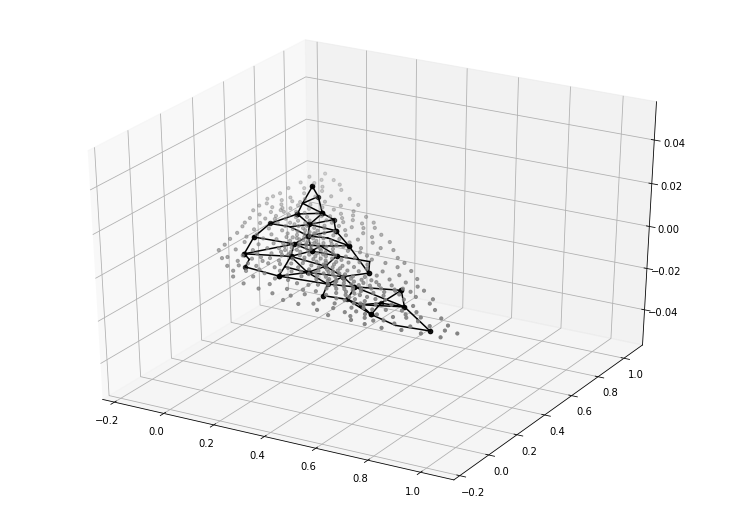

#2 : [40 ms] train: 0.050265


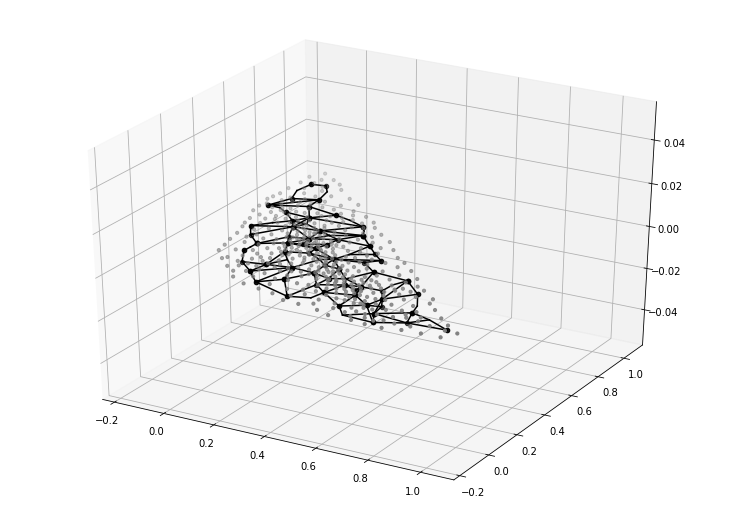

#3 : [52 ms] train: 0.039512


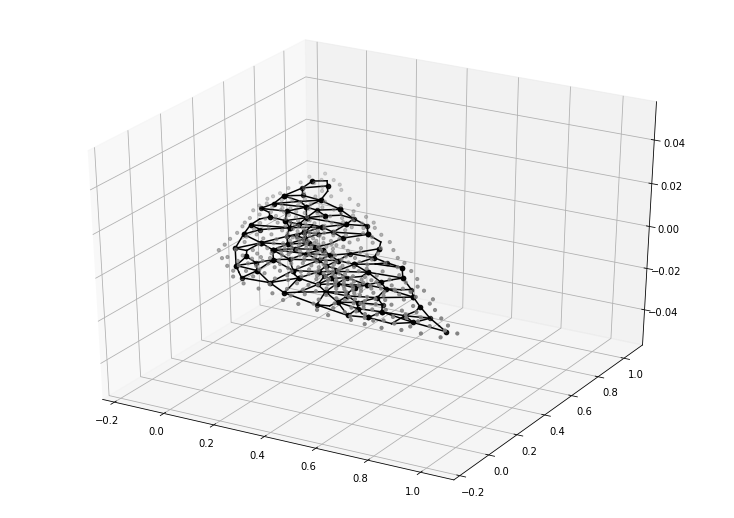

#4 : [66 ms] train: 0.032865


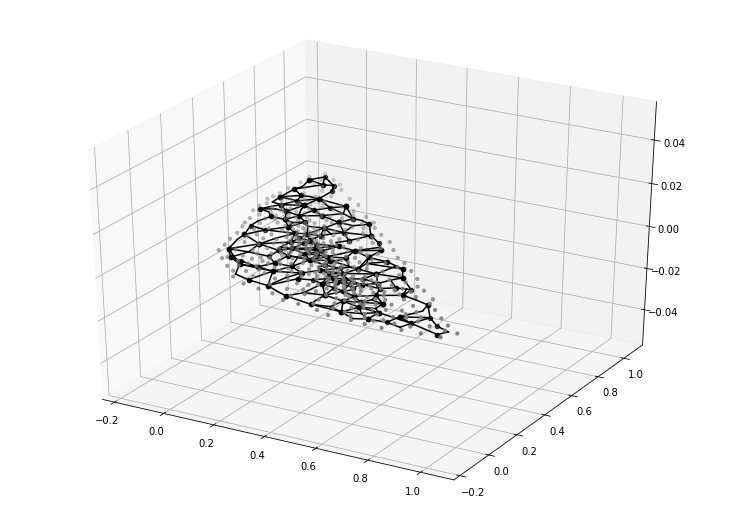

#5 : [73 ms] train: 0.028996


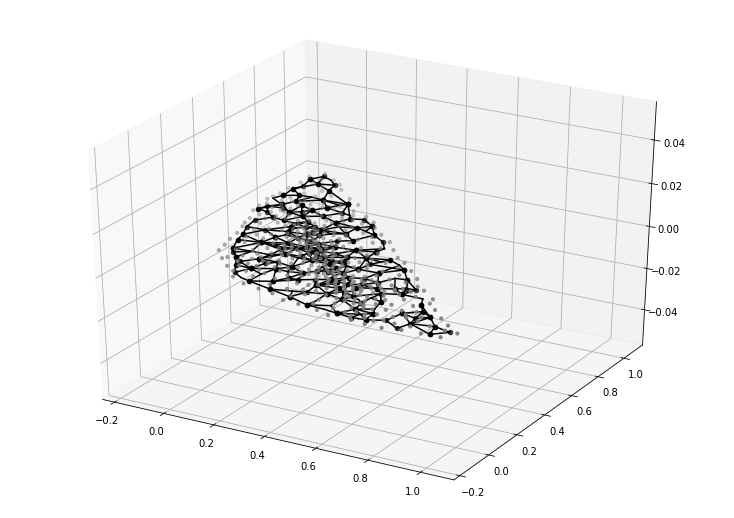

#6 : [82 ms] train: 0.025090


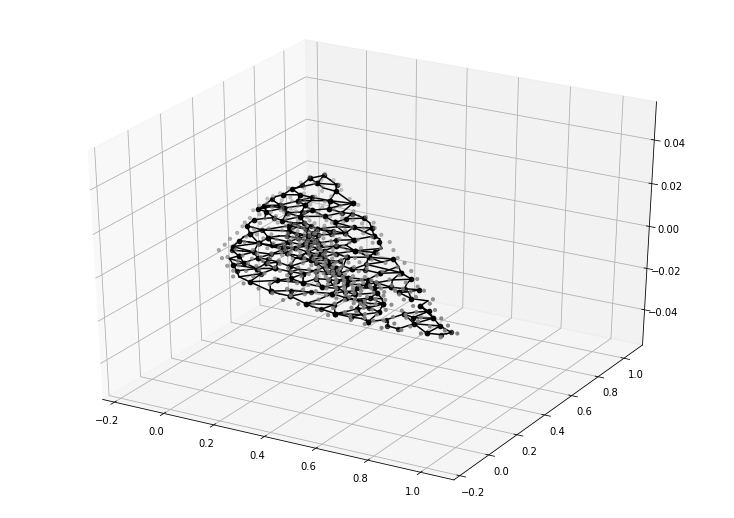

#7 : [102 ms] train: 0.021866


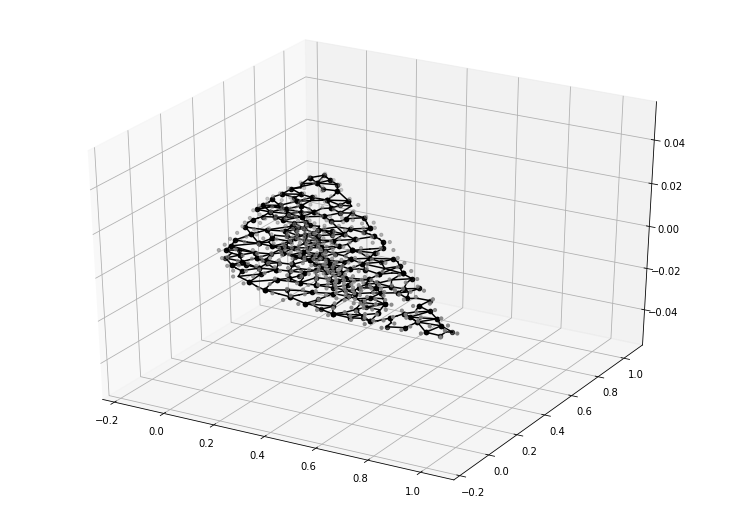

#8 : [129 ms] train: 0.018662


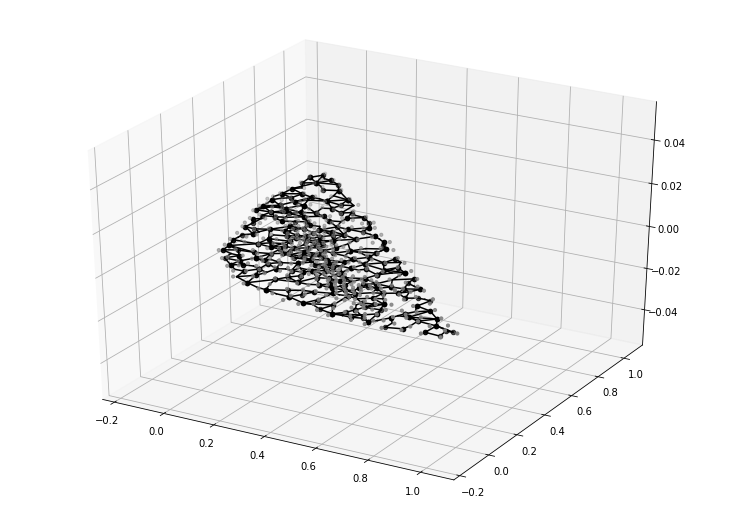

#9 : [132 ms] train: 0.016285


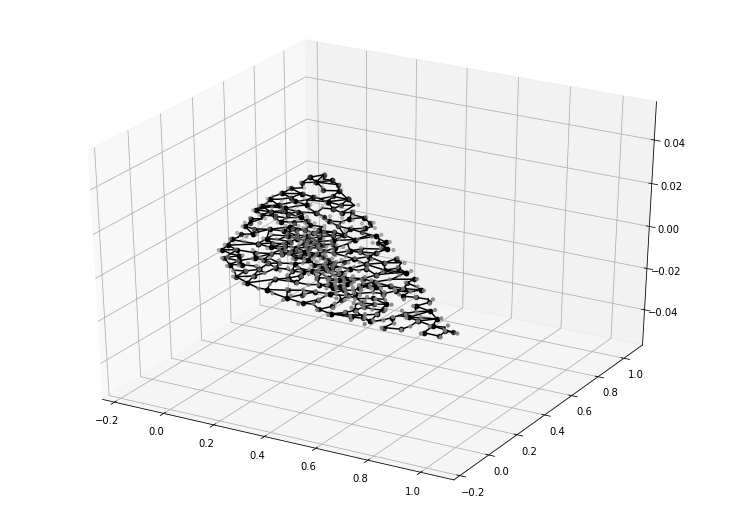

#10 : [223 ms] train: 0.014899


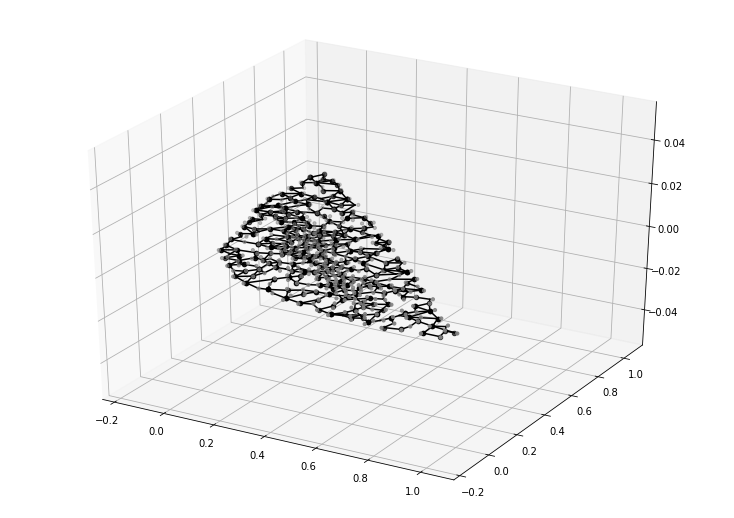

#11 : [150 ms] train: 0.013871


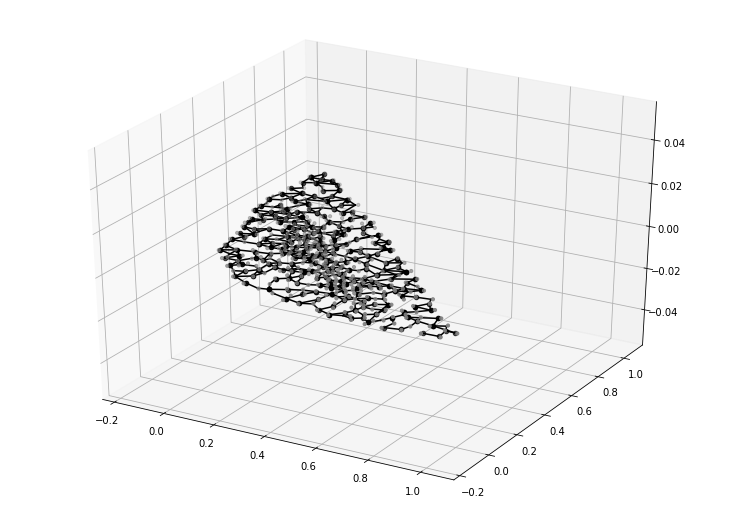

#12 : [204 ms] train: 0.013154


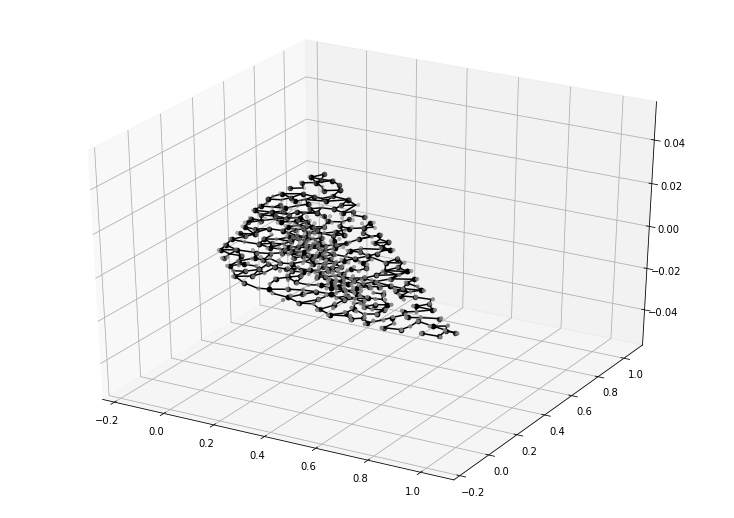

#13 : [279 ms] train: 0.013066


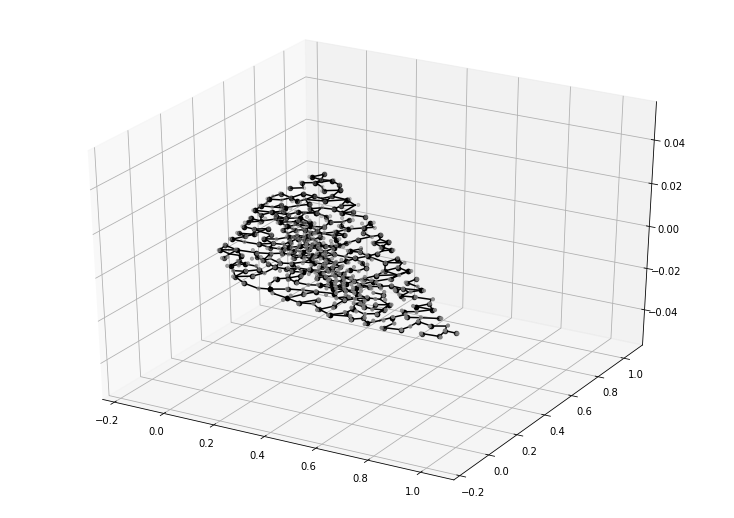

#14 : [194 ms] train: 0.012730


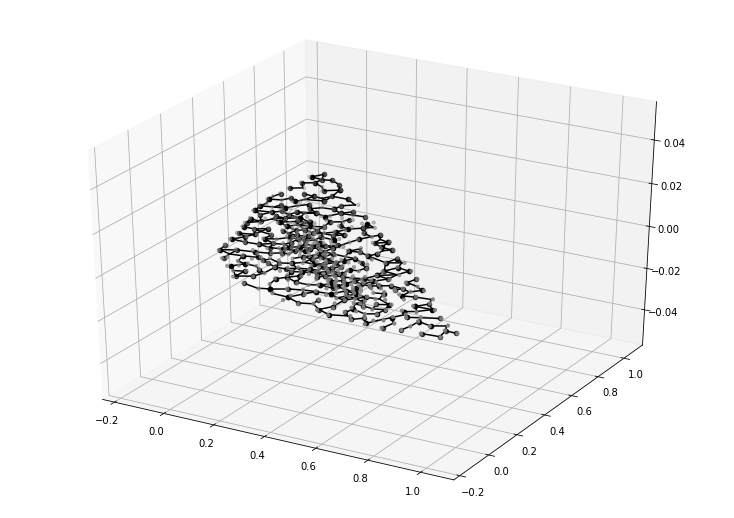

#15 : [129 ms] train: 0.012355


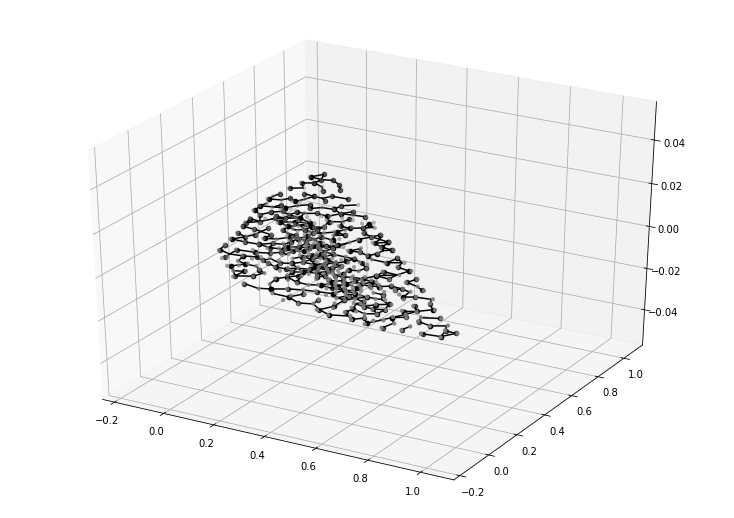

#16 : [152 ms] train: 0.012099


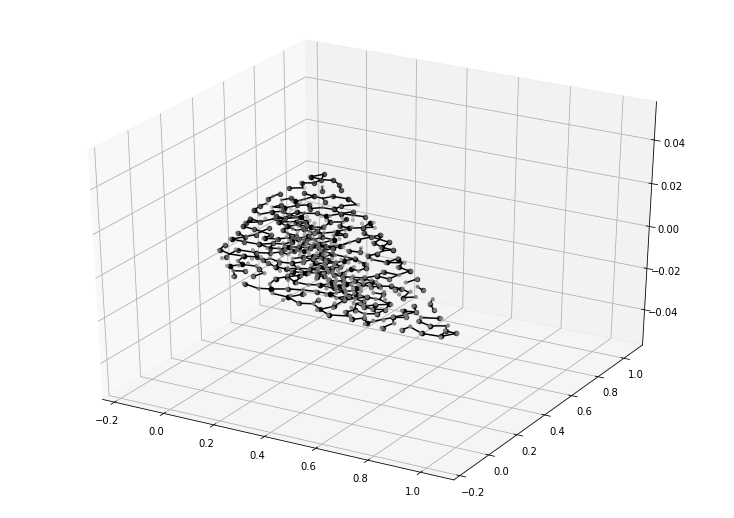

#17 : [224 ms] train: 0.012038


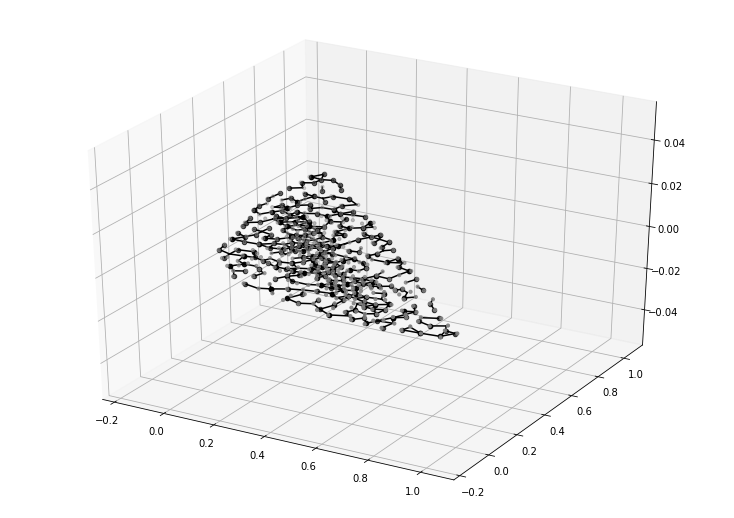

#18 : [187 ms] train: 0.011830


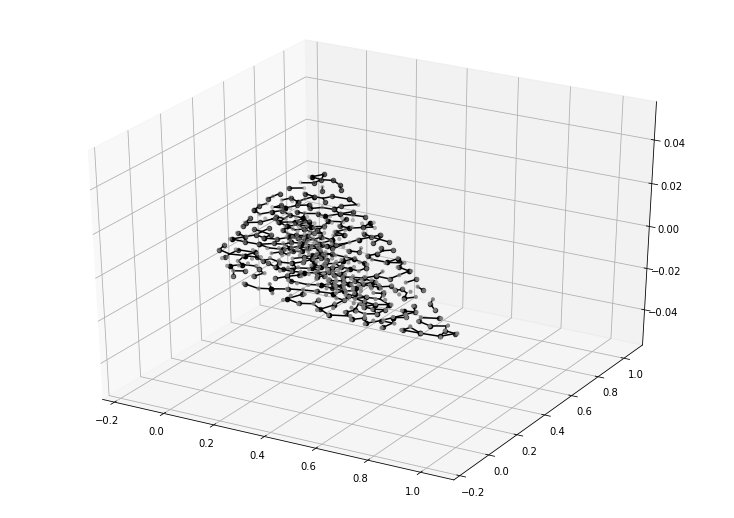

#19 : [139 ms] train: 0.011839


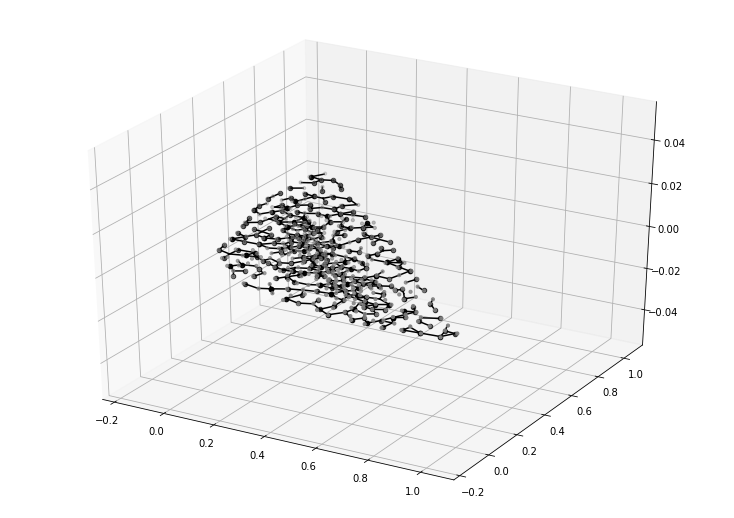

#20 : [129 ms] train: 0.011813


KeyboardInterrupt: 

In [25]:
# train the GNG netowrk

utils.reproducible()
gng = create_gng(max_nodes=308)

for epoch in range(50):
    gng.train(data, epochs=1)
    
    # Plot images after each iteration in order to see training progress
    draw_image(gng.graph)

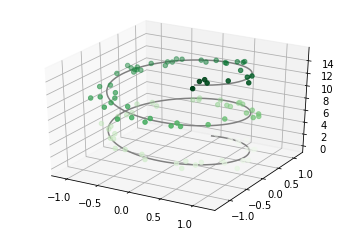

In [8]:
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');